In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
house_data = pd.read_csv(r"C:\Users\hp\OneDrive\Data Science\Practical\Machine Learning\Dataset\House_data.csv")
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
space = house_data['sqft_living15']
price = house_data['price']

In [5]:
space

0        1340
1        1690
2        2720
3        1360
4        1800
         ... 
21608    1530
21609    1830
21610    1020
21611    1410
21612    1020
Name: sqft_living15, Length: 21613, dtype: int64

In [9]:
# divide data into independant variable
x = np.array(space).reshape(-1,1)
x

array([[1340],
       [1690],
       [2720],
       ...,
       [1020],
       [1410],
       [1020]], dtype=int64)

In [13]:
# divide data into dependant variable
y = np.array(price)
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [14]:
# no null values
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# price and sqft_living15 both are in numeric format so no need to chnage datatype and label encoder

In [21]:
house_data['price'].dtype

dtype('float64')

In [23]:
house_data['sqft_living15'].dtype

dtype('int64')

In [ ]:
# split data into train and test

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [31]:
# model created
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
#Predicting the prices
y_pred = regressor.predict(x_test)
y_pred

array([ 367106.34941724, 1243187.15125146,  370235.20942379, ...,
        498518.46969237,  479745.30965307,  332688.88934518])

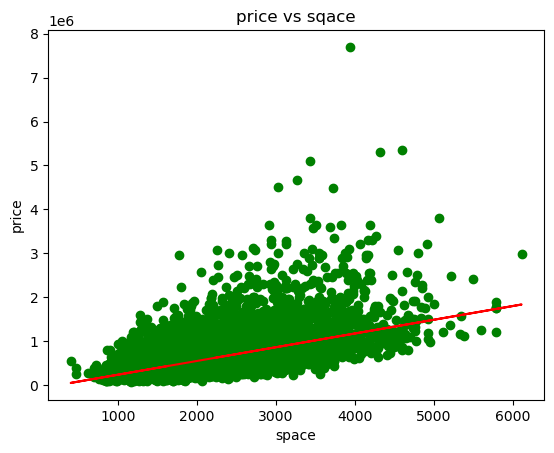

In [35]:
#Visualizing the training Results 
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.title("price vs sqace")
plt.xlabel("space")
plt.ylabel("price")
plt.show()

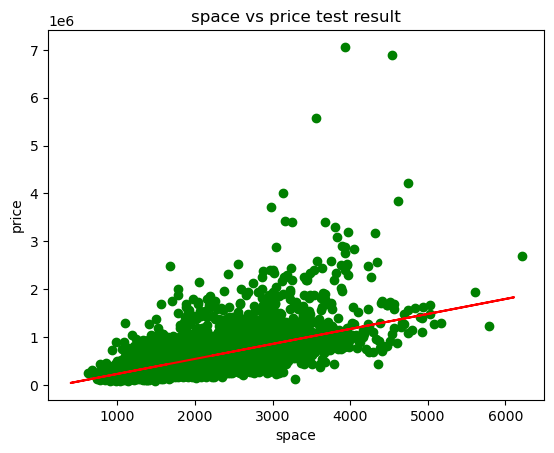

In [37]:
#Visualizing the testing Results

plt.scatter(x_test,y_test,color='green')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.title('space vs price test result')
plt.xlabel('space')
plt.ylabel('price')
plt.show()

In [39]:
bias = regressor.score(x_train,y_train)
bias

0.3442855360774023

In [41]:
variance = regressor.score(x_test,y_test)
variance

0.33892925422038356

In [ ]:
# no bias no variance so model is good fitted